Taken from: https://levelup.gitconnected.com/representing-a-square-wave-with-a-fourier-series-and-python-6d43beb19442

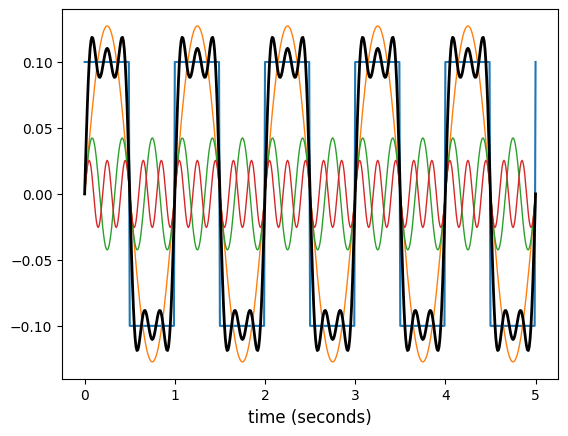

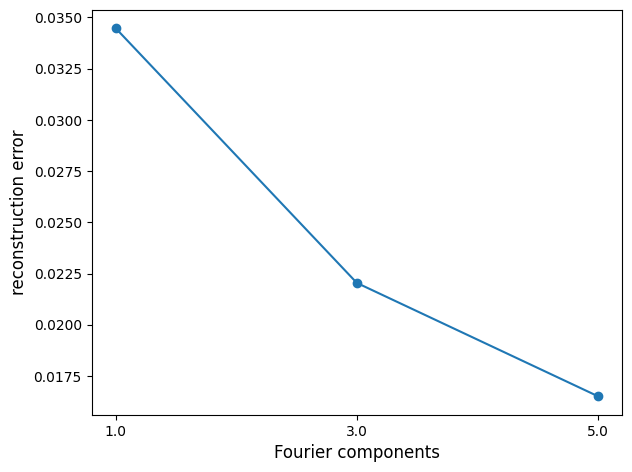

In [4]:
import numpy as np
import pylab as plt
plt.ion()

def square1(t, T, A=0.1):
    ''' square function of amplitude A and period T
    '''
    ytmp = 1-np.array(2*t/T,'int')%2                      # 0/1 sequence
    yt = A*(2*ytmp-1)                                     # multiply to get -A a +A
    return yt

def bn(n, A=0.1):
    """"Compute b(n)."""
    temp = 2 * A * (1-(-1)**n)/(n*np.pi)
    return temp

plt.figure(1)
A, T = 0.1, 1 
f = 1/T # freq
omega = 2 * np.pi * f
t = np.arange(0, 5+0.01, 0.01)
y = square1(t, T, A)
plt.plot(t, y)

num_comp = 3 # num components

num = len(t)
y_tot = np.zeros(num)
y_err = np.zeros(num_comp)
x_err = np.zeros(num_comp)

for n_comp in range(num_comp):
    n = 2*n_comp+1
    #n = n_comp + 1  
    x_err[n_comp] = n
    fn = bn(n,A)
    yn = fn * np.sin(n*omega*t) #/ n
    y_tot = y_tot + yn
    y_err[n_comp] = np.mean(np.abs(y_tot-y))
    plt.plot(t, yn, lw=1, linestyle='-', label='n=%d'%n)

plt.plot(t, y_tot, c='k', linestyle='-', lw=2)    
#plt.legend()
plt.xlabel('time (seconds)', fontsize=12)


plt.figure(2)
plt.plot(y_err,marker='o', )
plt.xticks(np.arange(num_comp),x_err)
plt.xlabel('Fourier components', fontsize=12)
plt.ylabel('reconstruction error', fontsize=12)
plt.tight_layout(pad=1)
